In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
sns.set(rc={'figure.figsize' : (12, 6)})
sns.set_style("darkgrid", {'axes.grid' : True})
import skimage

import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.tsv', delimiter = '\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
df_1 = df.drop(columns=['PhraseId', 'SentenceId'])
df_1.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [4]:
df_1.shape

(156060, 2)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 2 columns):
Phrase       156060 non-null object
Sentiment    156060 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
df_1.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer()- Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()
vect_texts = vectorizer.fit_transform(list(df['Phrase']))
print(type(vect_texts))
print(vect_texts.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(156060, 15240)


In [8]:
# Split data to label (y) and features (X)

# There are 50000 datapoints with 20000 feature each.

X = vect_texts.toarray()
#X = vect_data.toarray()
print('The shape of the features of the dataset is: ',X.shape)

# there are 50000 labels that are under sentiment column.
y = (np.array(df_1['Sentiment']))
print('The shape of the labels of the dataset is: ',y.shape)

The shape of the features of the dataset is:  (156060, 15240)
The shape of the labels of the dataset is:  (156060,)


In [9]:
from sklearn.model_selection import train_test_split

# Here we split data to training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("Train features shape: {0}, \nTest features shape: {1}".format(X_train.shape, 
                                                                   X_test.shape))
print("Train label shape: {0}, \nTest label shape: {1}".format(y_train.shape, 
                                                                   y_test.shape))

#The testing label is 10000 and the training label in 40000 and each has 20000 features 
#related to it.

Train features shape: (124848, 15240), 
Test features shape: (31212, 15240)
Train label shape: (124848,), 
Test label shape: (31212,)


In [10]:
from keras.utils.np_utils import to_categorical

#Since we have to categorize only the labels not the features into different classes we do 
#following peration only on the y.

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

Using TensorFlow backend.


In [11]:
from keras import models
from keras import layers
from keras.utils import to_categorical

input_shape_of_feature = X_train.shape[1:]
print(input_shape_of_feature)

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=input_shape_of_feature))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

(15240,)


In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
# For the validation purpose we are further dividing the feature training dataset into 
#validation and training dataset.
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

# For the validation purpose we are further dividing the label training dataset into 
#validation and training dataset.
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [14]:
# By using the fit method we are traing the model using train_X, train_y and validating it 
# on x_val, y_val which will give us 'val_loss', 'val_acc', 'training_loss', 'training_acc'
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 123848 samples, validate on 1000 samples
Epoch 1/20
123848/123848 [==============================] - 32s 255us/step - loss: 1.0952 - accuracy: 0.5771 - val_loss: 0.9415 - val_accuracy: 0.6120
Epoch 2/20
123848/123848 [==============================] - 27s 222us/step - loss: 0.8405 - accuracy: 0.6652 - val_loss: 0.8978 - val_accuracy: 0.6270
Epoch 3/20
123848/123848 [==============================] - 29s 236us/step - loss: 0.7705 - accuracy: 0.6935 - val_loss: 0.8844 - val_accuracy: 0.6310
Epoch 4/20
123848/123848 [==============================] - 26s 207us/step - loss: 0.7278 - accuracy: 0.7118 - val_loss: 0.8799 - val_accuracy: 0.6430
Epoch 5/20
123848/123848 [==============================] - 27s 220us/step - loss: 0.6962 - accuracy: 0.7239 - val_loss: 0.8835 - val_accuracy: 0.6480
Epoch 6/20
123848/123848 [==============================] - 26s 208us/step - loss: 0.6695 - accuracy: 0.7348 - val_loss: 0.8935 - val_accuracy: 0.6430
Epoch 7/20
123848/123848 [==================

In [15]:
model_history_dict = history.history
model_history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

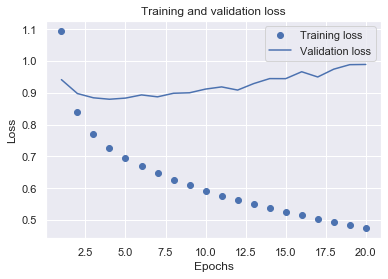

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

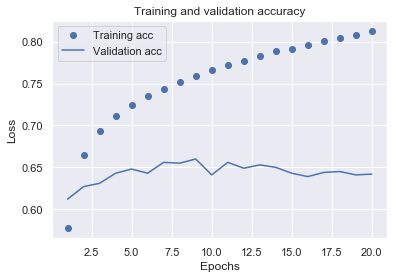

In [17]:
acc = model_history_dict['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=input_shape_of_feature))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, 
          validation_data=(x_val, y_val))

Train on 123848 samples, validate on 1000 samples
Epoch 1/9
123848/123848 [==============================] - 27s 217us/step - loss: 1.1147 - accuracy: 0.5710 - val_loss: 0.9372 - val_accuracy: 0.6160
Epoch 2/9
123848/123848 [==============================] - 28s 229us/step - loss: 0.8394 - accuracy: 0.6674 - val_loss: 0.8910 - val_accuracy: 0.6420
Epoch 3/9
123848/123848 [==============================] - 27s 215us/step - loss: 0.7679 - accuracy: 0.6946 - val_loss: 0.8789 - val_accuracy: 0.6440
Epoch 4/9
123848/123848 [==============================] - 30s 242us/step - loss: 0.7263 - accuracy: 0.7125 - val_loss: 0.8762 - val_accuracy: 0.6530
Epoch 5/9
123848/123848 [==============================] - 28s 224us/step - loss: 0.6948 - accuracy: 0.7254 - val_loss: 0.8834 - val_accuracy: 0.6570
Epoch 6/9
123848/123848 [==============================] - 27s 215us/step - loss: 0.6701 - accuracy: 0.7362 - val_loss: 0.8798 - val_accuracy: 0.6550
Epoch 7/9
123848/123848 [=========================

In [19]:
# the parameters in the evalute return the loss and the metric value which is specified 
# under the compile method.

test_loss, test_acc = model.evaluate(X_test, test_labels)

print('The test loss is: ', test_loss)
print('The test accuracy is: ',test_acc)

31212/31212 [==============================] - 6s 194us/step
The test loss is:  0.8673412183087926
The test accuracy is:  0.6676278114318848


In [20]:
predictions = model.predict(X_test)

In [21]:
# Each entry in predictions is a vector of length 5
predictions[0].shape

(5,)

In [22]:
# The coefficients in this vector sum to 1:
np.sum(predictions[0])

1.0

In [23]:
# The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0])

2